In [1]:
# We load the data

import numpy as np

In [2]:
X = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')

In [3]:
# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [4]:
# We plot the data

import matplotlib.pyplot as plt

In [5]:
##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

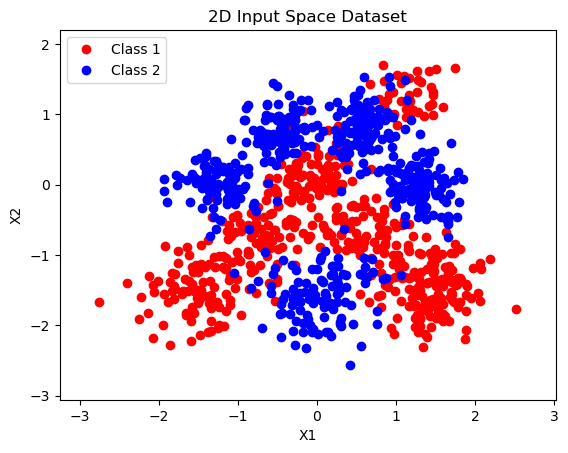

In [6]:
##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y, title):
    xx, yy = plot_data_internal(X, y)
    plt.title(title)
    plt.show()

plot_data(X, y, title='2D Input Space Dataset')

In [7]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [8]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))


In [9]:
##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))


In [10]:
##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#
def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


In [11]:
##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#
def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)


In [12]:
##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left) 
# y_train: vector of training binary output labels 
# X_tile_test: matrix of test input features (with a constant 1 appended to the left) 
# y_test: vector of test binary output labels 
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output: 
# 
# 1 - Vector of model parameters w 
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#
def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)

        gradient = X_tilde_train.T @ (y_train - sigmoid_value)

        w = w + alpha * gradient

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [13]:
# We train the classifier

alpha = 0.001
n_steps = 200

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-0.6539192379684028 -0.609469383150993
-0.645821932079931 -0.6034102838898698
-0.6405211999576537 -0.5995924355973845
-0.6371243763052742 -0.5972533589155226
-0.6349818432259471 -0.5958491301808718
-0.6336450090757763 -0.5950145635016153
-0.6328162667011221 -0.5945163604480083
-0.6323039249550199 -0.5942114820742427
-0.6319870799160701 -0.5940152583334726
-0.6317905531991551 -0.5938791388680303
-0.6316680166344402 -0.5937761346337765
-0.6315910603134958 -0.5936917260325422
-0.6315422921948585 -0.5936183862294439
-0.6315110565643706 -0.5935523804420605
-0.6314908062653729 -0.5934919472151937
-0.6314775001815799 -0.5934362950546686
-0.6314686289183922 -0.5933850680953486
-0.6314626227231095 -0.5933380748833289
-0.6314584911663771 -0.5932951606158732
-0.6314556032098464 -0.5932561547864403
-0.6314535523929533 -0.5932208564051397
-0.6314520737565995 -0.5931890363383057
-0.6314509923286495 -0.5931604461134612
-0.6314501909529484 -0.5931348279512361
-0.6314495900384703 -0.593111923697893
-0.

In [14]:
w.shape

(3,)

In [15]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll, title):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title(title)
    plt.show()

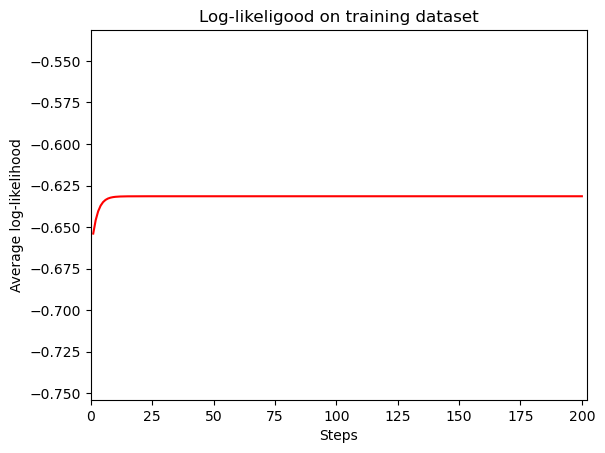

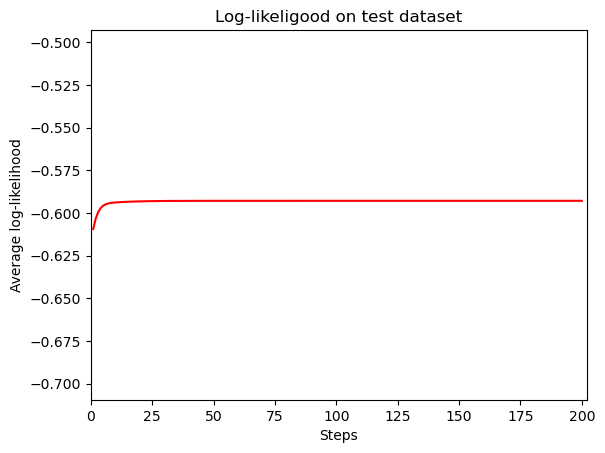

In [16]:
# We plot the training and test log likelihoods

plot_ll(ll_train, title='Log-likeligood on training dataset')
plot_ll(ll_test, title='Log-likeligood on test dataset')

In [17]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, title, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.title(title)
    plt.show()

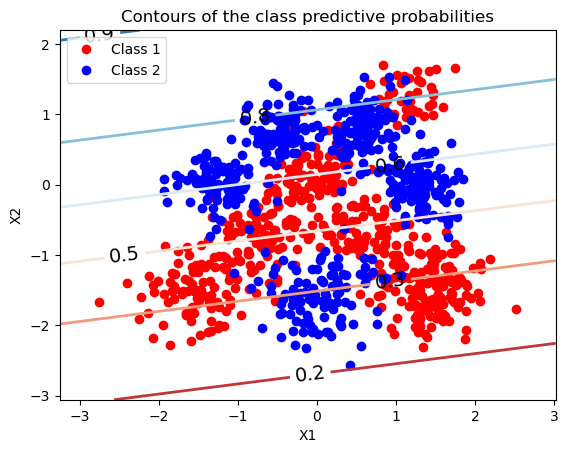

In [18]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w, title='Contours of the class predictive probabilities')

In [19]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix

In [20]:
X_tilde = get_x_tilde(X)
Z = predict(X_tilde, w)

def threshold(ll, thres):
    return np.array([1 if likelihood > thres else 0 for likelihood in ll])

thres = 0.5
ll_thres = threshold(Z, thres)
confusion_matrix(y, ll_thres, normalize="true")

array([[0.70948617, 0.29051383],
       [0.27935223, 0.72064777]])

In [21]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [22]:
# We expand the data

l = 1

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

In [29]:
X_tilde_train.shape

(800, 801)

In [24]:
# We train the new classifier on the feature expanded inputs

alpha = 0.0001
n_steps = 1000

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-3.528364682468423 -3.6583271329891325
-3.0436909583741523 -3.139251288607422
-2.610253768373018 -2.677414115253423
-2.2270049273339243 -2.267833638951611
-1.897333260073661 -1.9124238559552527
-1.6285694567232798 -1.6211600927875904
-1.429183559305763 -1.4073687854514467
-1.294251824798475 -1.2674956608598016
-1.2044007521495805 -1.1784767450540343
-1.141810579944768 -1.118816832727196
-1.0954590033198568 -1.0757707358985085
-1.058996792759604 -1.0423772539740173
-1.0287155583727137 -1.0147517834762025
-1.002406995088839 -0.9906754726832875
-0.9787396248819052 -0.9688672434392135
-0.9569054118916506 -0.9485856727178508
-0.9364128729762501 -0.9294029634809591
-0.9169633393212671 -0.9110742817797131
-0.8983758847798695 -0.8934614297054011
-0.8805413331370019 -0.8764879036755733
-0.8633938986376468 -0.860112279683691
-0.8468936372430532 -0.8443124165420489
-0.8310155808099067 -0.8290761089947538
-0.8157430277611931 -0.8143956164928318
-0.801063429994011 -0.8002645311057337
-0.78696590591

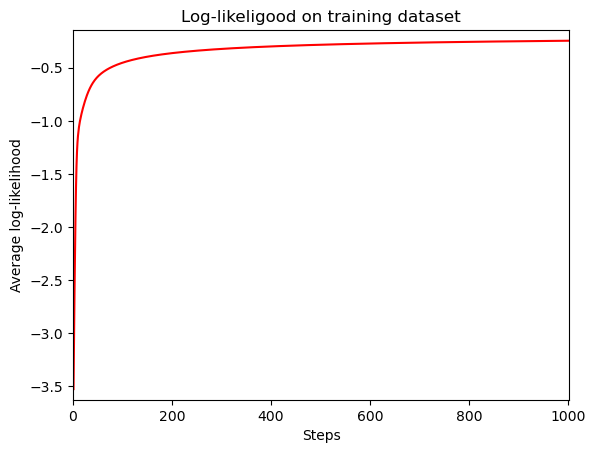

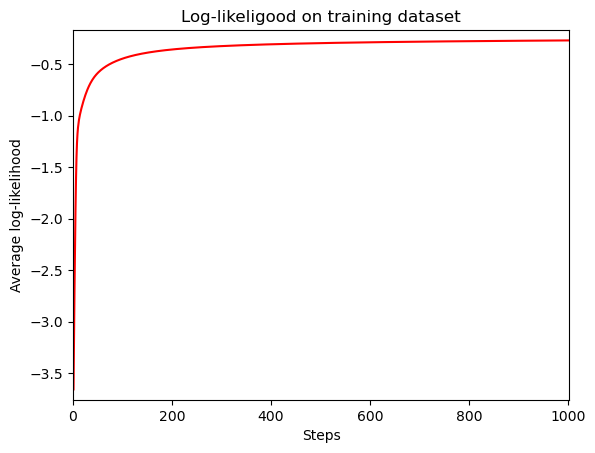

In [25]:
# We plot the training and test log likelihoods

plot_ll(ll_train, title='Log-likeligood on training dataset')
plot_ll(ll_test, title='Log-likeligood on training dataset')

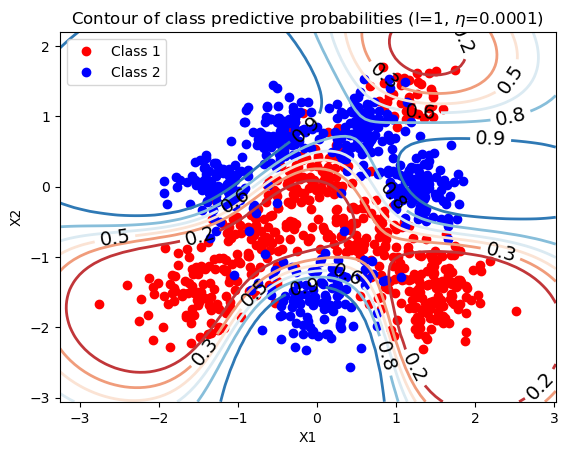

In [26]:
# We plot the predictive distribution

title = 'Contour of class predictive probabilities (l=1, $\eta$=0.0001)'
plot_predictive_distribution(X, y, w, title, lambda x : evaluate_basis_functions(l, x, X_train))

In [27]:
w.shape

(801,)

In [28]:
X_tilde = get_x_tilde(evaluate_basis_functions(l, X, X_train))
Z = predict(X_tilde, w)

def threshold(ll, thres):
    return np.array([1 if likelihood > thres else 0 for likelihood in ll])

thres = 0.5
ll_thres = threshold(Z, thres)
confusion_matrix(y, ll_thres, normalize="true")

array([[0.8972332 , 0.1027668 ],
       [0.08502024, 0.91497976]])